In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Ruta a los archivos en Google Drive
train_path = '/content/drive/MyDrive/M5-UDD/Clase 1/train.csv'

# Cargar el dataset de entrenamiento
train_data = pd.read_csv(train_path)

# Separar características y etiquetas
X = train_data.drop("price_range", axis=1)
y = train_data["price_range"]

# Dividir datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Construir y entrenar el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_normalized, y_train, epochs=20, batch_size=32, validation_data=(X_val_normalized, y_val), verbose=1)


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.3585 - loss: 1.3532 - val_accuracy: 0.6375 - val_loss: 0.9008
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7110 - loss: 0.7663 - val_accuracy: 0.8850 - val_loss: 0.4274
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9063 - loss: 0.3713 - val_accuracy: 0.8975 - val_loss: 0.2721
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9225 - loss: 0.2415 - val_accuracy: 0.9100 - val_loss: 0.2281
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9524 - loss: 0.1602 - val_accuracy: 0.9075 - val_loss: 0.2040
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.1162 - val_accuracy: 0.9200 - val_loss: 0.1808
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0881 - val_accuracy: 0.9200 - val_loss: 0.2129
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.0811 - val_accuracy: 0.9225 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


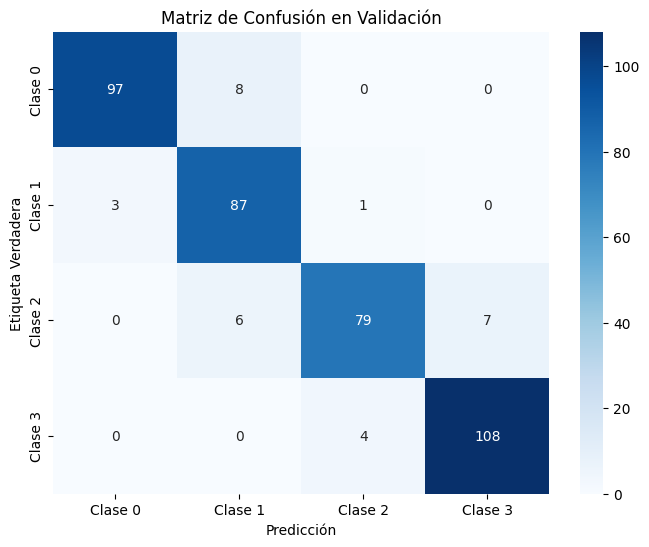

Reporte de Clasificación en Validación:
              precision    recall  f1-score   support

     Clase 0       0.97      0.92      0.95       105
     Clase 1       0.86      0.96      0.91        91
     Clase 2       0.94      0.86      0.90        92
     Clase 3       0.94      0.96      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generar matriz de confusión y reporte de clasificación en validación
y_val_pred_probs = model.predict(X_val_normalized)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.title("Matriz de Confusión en Validación")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación en Validación:")
print(classification_report(y_val, y_val_pred, target_names=["Clase 0", "Clase 1", "Clase 2", "Clase 3"]))

In [ ]:
# Predicciones con el archivo test

# Ruta al archivo de prueba en Google Drive
test_path = '/content/drive/MyDrive/M5-UDD/Clase 1/test.csv'

# Cargar el dataset de prueba
test_data = pd.read_csv(test_path)

# Normalizar los datos del conjunto de prueba
X_test = test_data.drop("id", axis=1)  # Eliminar la columna 'id'
X_test_normalized = scaler.transform(X_test)

# Generar predicciones para las primeras 20 muestras del conjunto de prueba
predictions_probs = model.predict(X_test_normalized[:20])
predicted_classes = np.argmax(predictions_probs, axis=1)

# Mostrar las predicciones
print("Predicciones para las primeras 20 muestras del conjunto de prueba:")
print(predicted_classes)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Predicciones para las primeras 20 muestras del conjunto de prueba:
[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2]
